In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

In [2]:
train = datasets.MNIST("", train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))

In [3]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = False)

In [6]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return F.log_softmax(x, dim=1)

net = Net()

In [8]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001)

EPOCHS = 5

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)



tensor(0.2205, grad_fn=<NllLossBackward>)
tensor(0.0199, grad_fn=<NllLossBackward>)
tensor(0.1641, grad_fn=<NllLossBackward>)
tensor(0.0045, grad_fn=<NllLossBackward>)
tensor(0.0021, grad_fn=<NllLossBackward>)


In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1, 28*28))
    
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct+=1
            total+=1
print((correct/total)*100)


In [14]:
import PIL
from PIL import Image
import numpy as np

image = Image.open("Untitled.png")
image = PIL.ImageOps.invert(image)

image = image.resize((28, 28))

img = np.array(image)
img = np.mean(img, axis=2)
img = img.reshape(-1, 784)



tensor([[-1697.0933,  -696.1024,  -866.5338,     0.0000, -1124.2439,  -954.5363,
         -1759.9473,  -902.8535,  -935.3558,  -662.1648]],
       grad_fn=<LogSoftmaxBackward>)
tensor(3, grad_fn=<NotImplemented>)


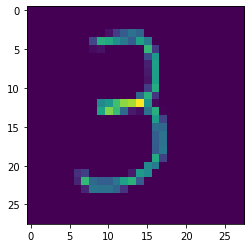

In [16]:
img = torch.Tensor(img)

plt.imshow(img.view(28, 28))

op = net(img.view(-1, 784))
print(op)
print(torch.argmax(op[0]))